# Time Series Analysis

# ARIMA and Seasonal ARIMA
### Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

    1. Visualize the Time Series Data
    2. Make the time series data stationary
    3. Plot the Correlation and AutoCorrelation Charts
    4. Construct the ARIMA Model or Seasonal ARIMA based on the data
    5. Use the model to make predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Indexdataset= pd.read_excel('Airlines+Data.xlsx',sheet_name='Sheet1')
Indexdataset

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
Indexdataset.isna().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
#Convert to date
Indexdataset['Month']=pd.to_datetime(Indexdataset['Month'])
Indexdataset

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
Indexdataset.set_index('Month',inplace=True)

In [6]:
Indexdataset

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [7]:
Indexdataset.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Visualize Data

Text(0, 0.5, 'No. of Passengers')

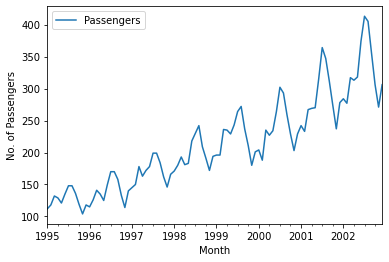

In [8]:
Indexdataset.plot()
plt.ylabel('No. of Passengers')

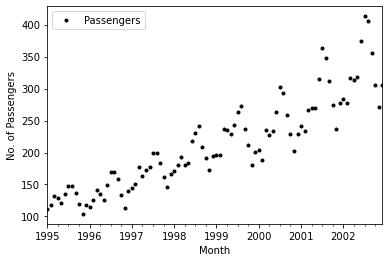

In [9]:
Indexdataset.plot(style='k.')
plt.ylabel('No. of Passengers')
plt.show()

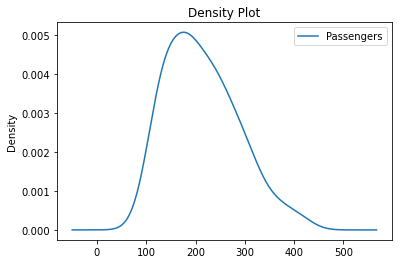

In [10]:
Indexdataset.plot(kind='kde')
plt.title('Density Plot')
plt.show()

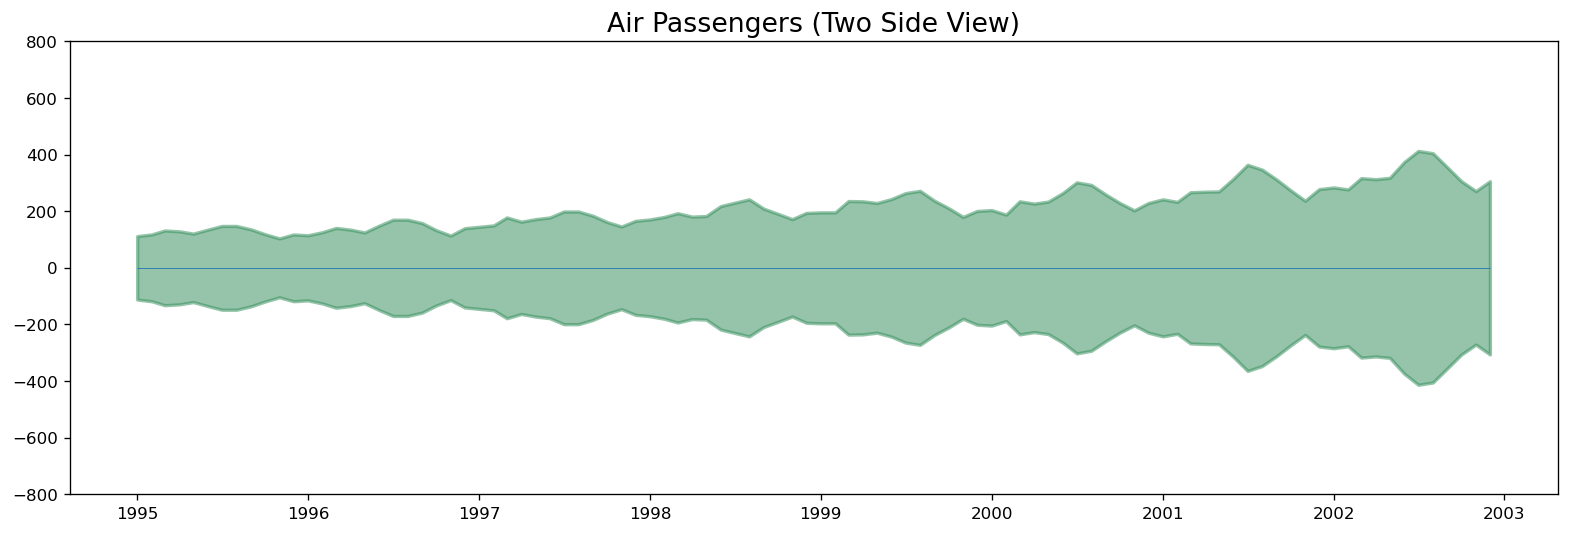

In [11]:
df= pd.read_excel('Airlines+Data.xlsx',sheet_name='Sheet1',parse_dates=['Month'])
x = df['Month'].values
y1 = df['Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Month']), xmax=np.max(df['Month']), linewidth=.5)
plt.show()

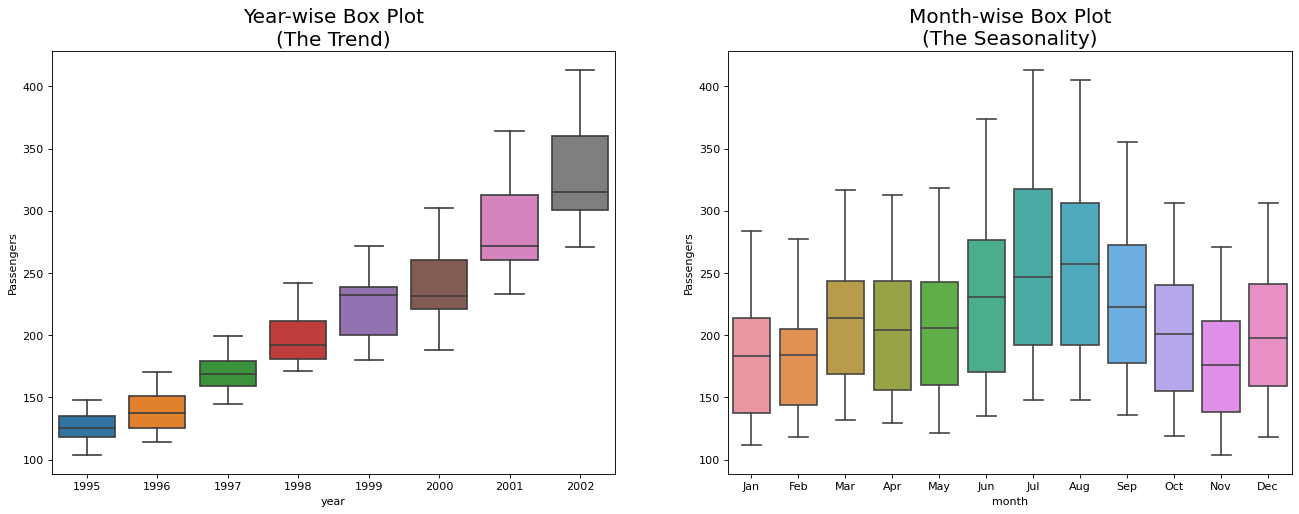

In [12]:
import seaborn as sns
# Import Data
df = pd.read_excel('Airlines+Data.xlsx',sheet_name='Sheet1', parse_dates=['Month'], index_col='Month')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Month]
df['month'] = [d.strftime('%b') for d in df.Month]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Passengers', data=df, ax=axes[0])
sns.boxplot(x='month', y='Passengers', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Check time series data for stationary

We can check that the data is stationery or not by two methods. 
1. Plotting rolling mean and Standard deviation.
2. By Performing Dickey-Fuller test know as ADF.

# Decompose Time-Series to see Individual Components 

We can decompose time-series to see various components of time-series. Python module named statmodels provides us with easy to use utility which we can use to get an individual component of time-series and then visualize it.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

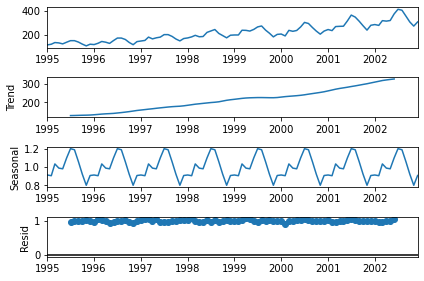

In [14]:
decompose_result_multiplicative = seasonal_decompose(Indexdataset, model="multiplicative")

trend_mul = decompose_result_multiplicative.trend
seasonal_mul = decompose_result_multiplicative.seasonal
residual_mul = decompose_result_multiplicative.resid

decompose_result_multiplicative.plot();

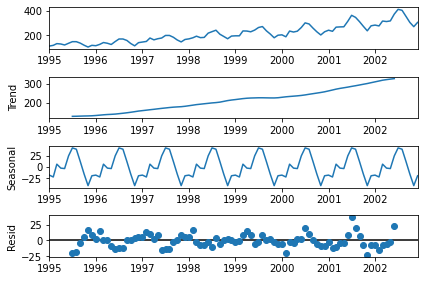

In [15]:
decompose_result_additive = seasonal_decompose(Indexdataset, model="additive")

trend_ad = decompose_result_additive.trend
seasonal_ad = decompose_result_additive.seasonal
residual_ad = decompose_result_additive.resid

decompose_result_additive.plot();

# Checking Whether Time-Series is Stationary or Not

In [16]:
rolmean= Indexdataset.rolling(window=12).mean()            # We are taking windows as 12 as this will give rolling mean at yearly level as our data is monthly given.
rolstd= Indexdataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


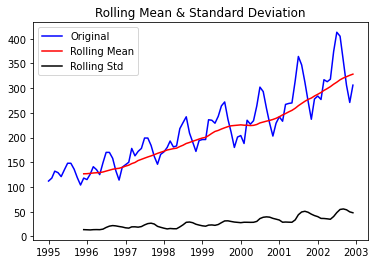

In [17]:
# Plot the rolling statistics
org= plt.plot(Indexdataset, color='blue',label= 'Original')
mean= plt.plot(rolmean, color='red',label='Rolling Mean')
dev= plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

As we can see our rolling mean and standard deviation are not constant and the data is not stationary.

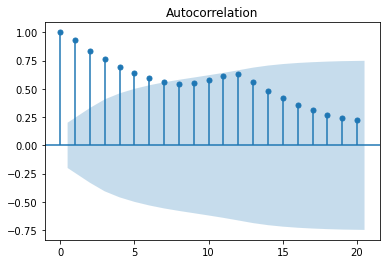

In [18]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(Indexdataset);

# Testing with Dicky-Fuller

In [19]:
#Ho: It is non stationary
#H1: It is stationary

#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller     

def ADF_test(timeseries, dataDesc):
     #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

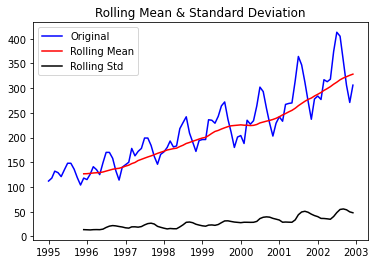

 > Is the raw data stationary ?
Test statistic = 1.340
P-value = 0.997
Critical values :
	1%: -3.5117123057187376 - The data is not stationary with 99% confidence
	5%: -2.8970475206326833 - The data is not stationary with 95% confidence
	10%: -2.5857126912469153 - The data is not stationary with 90% confidence


In [20]:
ADF_test(Indexdataset['Passengers'],'raw data')

# Remove Trend

# 1.Logged Transformation 

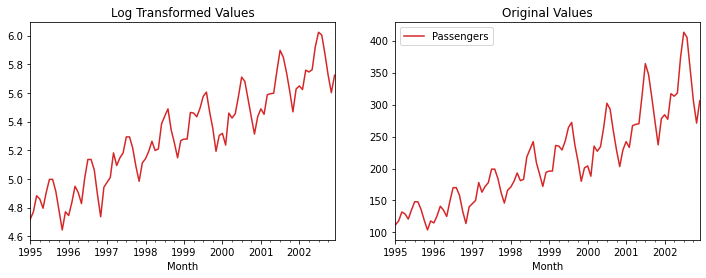

In [21]:
logged_passengers = Indexdataset["Passengers"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_passengers.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
Indexdataset.plot(color="tab:red", title="Original Values", ax=ax2);

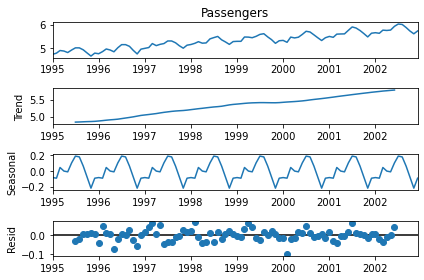

In [22]:
decompose_result = seasonal_decompose(logged_passengers)

decompose_result.plot();

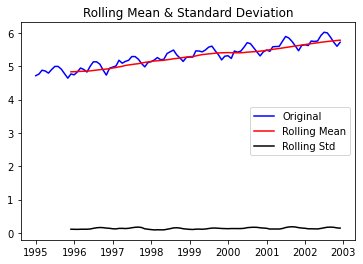

 > Is the Log Passengers stationary ?
Test statistic = -0.723
P-value = 0.841
Critical values :
	1%: -3.5117123057187376 - The data is not stationary with 99% confidence
	5%: -2.8970475206326833 - The data is not stationary with 95% confidence
	10%: -2.5857126912469153 - The data is not stationary with 90% confidence


In [23]:
ADF_test(logged_passengers,'Log Passengers')

# Power Transformations

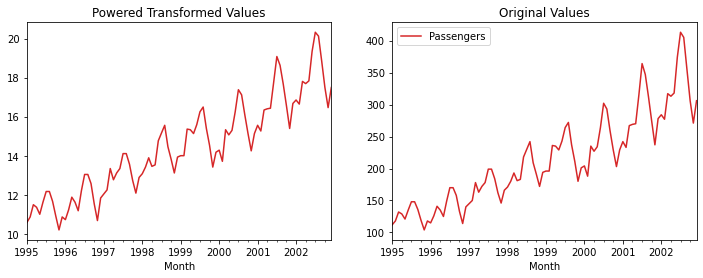

In [24]:
powered_passengers = Indexdataset["Passengers"].apply(lambda x : x ** 0.5)

ax1 = plt.subplot(121)
powered_passengers.plot(figsize=(12,4), color="tab:red", title="Powered Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
Indexdataset.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

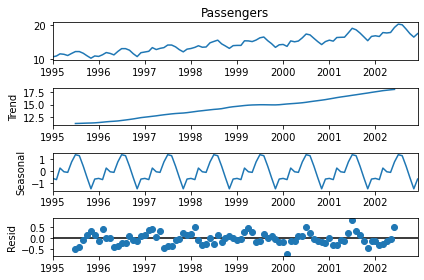

In [25]:
decompose_result = seasonal_decompose(powered_passengers)

decompose_result.plot();

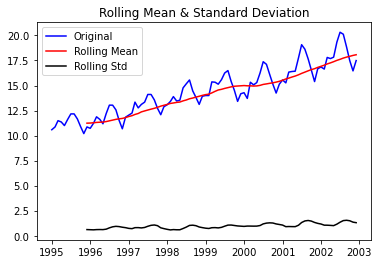

 > Is the Log Passengers stationary ?
Test statistic = 0.451
P-value = 0.983
Critical values :
	1%: -3.5117123057187376 - The data is not stationary with 99% confidence
	5%: -2.8970475206326833 - The data is not stationary with 95% confidence
	10%: -2.5857126912469153 - The data is not stationary with 90% confidence


In [26]:
ADF_test(powered_passengers,'Log Passengers')

# Applying Moving Window Functions

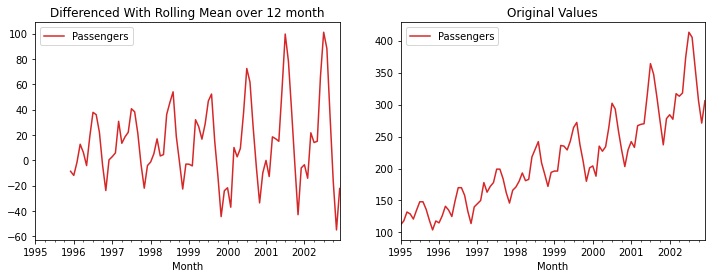

In [27]:
rolling_mean = Indexdataset.rolling(window = 12).mean()
passengers_rolled_detrended = Indexdataset - rolling_mean

ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
Indexdataset.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

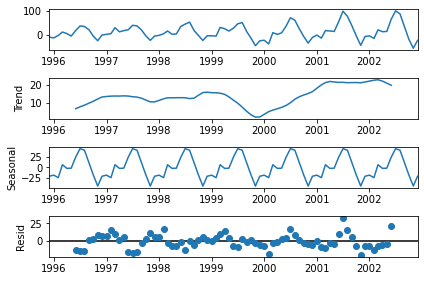

In [28]:
decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna())

decompose_result.plot();

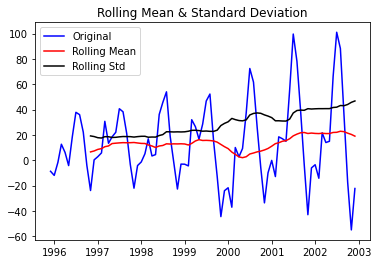

 > Is the Log Passengers stationary ?
Test statistic = -1.709
P-value = 0.427
Critical values :
	1%: -3.524624466842421 - The data is not stationary with 99% confidence
	5%: -2.9026070739026064 - The data is not stationary with 95% confidence
	10%: -2.5886785262345677 - The data is not stationary with 90% confidence


In [29]:
ADF_test(passengers_rolled_detrended,'Log Passengers')

# Applying Moving Window Function on Log Transformed Time-Series

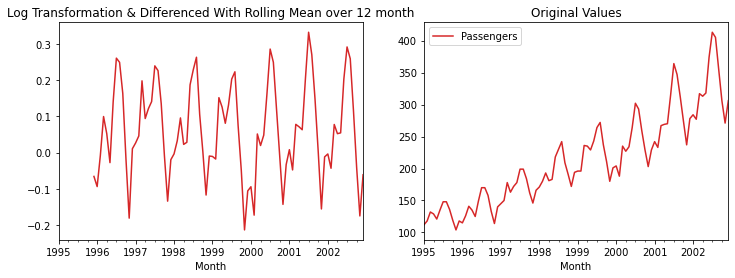

In [30]:
logged_passengers = pd.DataFrame(Indexdataset["Passengers"].apply(lambda x : np.log(x)))

rolling_mean = logged_passengers.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_passengers['Passengers'] - rolling_mean['Passengers']


ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
Indexdataset.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

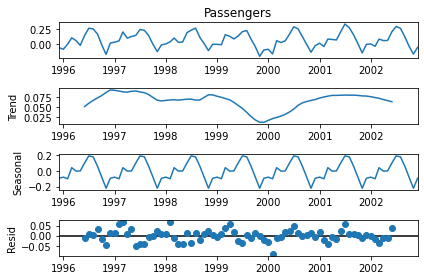

In [31]:
decompose_result = seasonal_decompose(passengers_log_rolled_detrended.dropna())

decompose_result.plot();

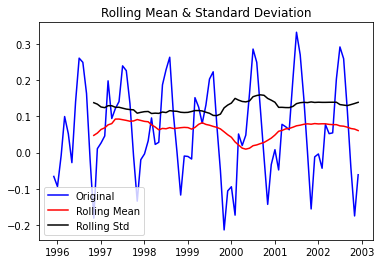

 > Is the Log Passengers stationary ?
Test statistic = -1.911
P-value = 0.327
Critical values :
	1%: -3.524624466842421 - The data is not stationary with 99% confidence
	5%: -2.9026070739026064 - The data is not stationary with 95% confidence
	10%: -2.5886785262345677 - The data is not stationary with 90% confidence


In [32]:
ADF_test(passengers_log_rolled_detrended,'Log Passengers')

# Applying Exponential Functions

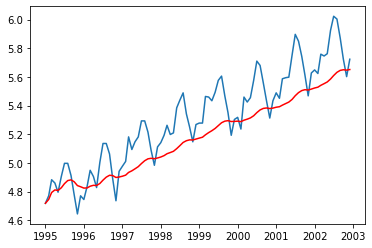

In [33]:
indexedDataset_logScale = np.log(Indexdataset)

exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

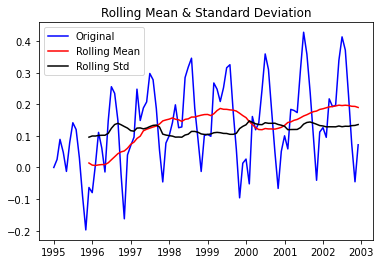

 > Is the Log Scale Minus Moving Exponential stationary ?
Test statistic = -2.835
P-value = 0.053
Critical values :
	1%: -3.5117123057187376 - The data is not stationary with 99% confidence
	5%: -2.8970475206326833 - The data is not stationary with 95% confidence
	10%: -2.5857126912469153 - The data is  stationary with 90% confidence


In [34]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
ADF_test(datasetLogScaleMinusMovingExponentialDecayAverage,'Log Scale Minus Moving Exponential')

# Remove Seasonality

## Differencing Over Log Transformed Time-Series

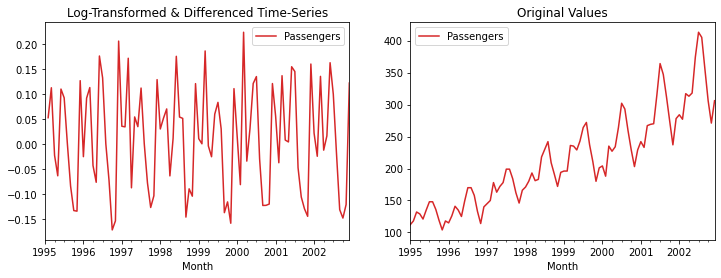

In [35]:
logged_passengers = pd.DataFrame(Indexdataset["Passengers"].apply(lambda x : np.log(x)))
logged_passengers_diff = logged_passengers - logged_passengers.shift()

ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
Indexdataset.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

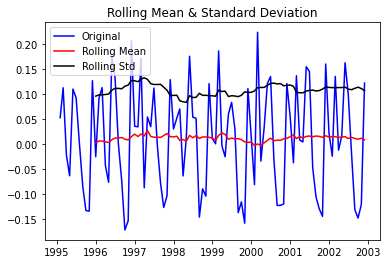

 > Is the Log Passengers Diff stationary ?
Test statistic = -2.671
P-value = 0.079
Critical values :
	1%: -3.512738056978279 - The data is not stationary with 99% confidence
	5%: -2.8974898650628984 - The data is not stationary with 95% confidence
	10%: -2.585948732897085 - The data is  stationary with 90% confidence


In [36]:
ADF_test(logged_passengers_diff,'Log Passengers Diff')

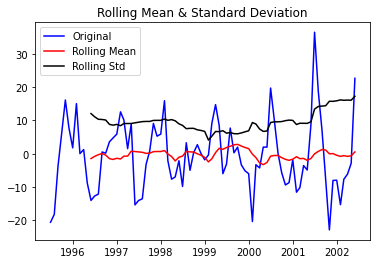

 > Is the decomposedLogData stationary ?
Test statistic = -5.988
P-value = 0.000
Critical values :
	1%: -3.5219803175527606 - The data is  stationary with 99% confidence
	5%: -2.9014701097664504 - The data is  stationary with 95% confidence
	10%: -2.58807215485756 - The data is  stationary with 90% confidence


In [37]:
decomposedLogData = residual_ad
decomposedLogData.dropna(inplace=True)
ADF_test(decomposedLogData,'decomposedLogData')

# Plot the Correlation and AutoCorrelation Charts

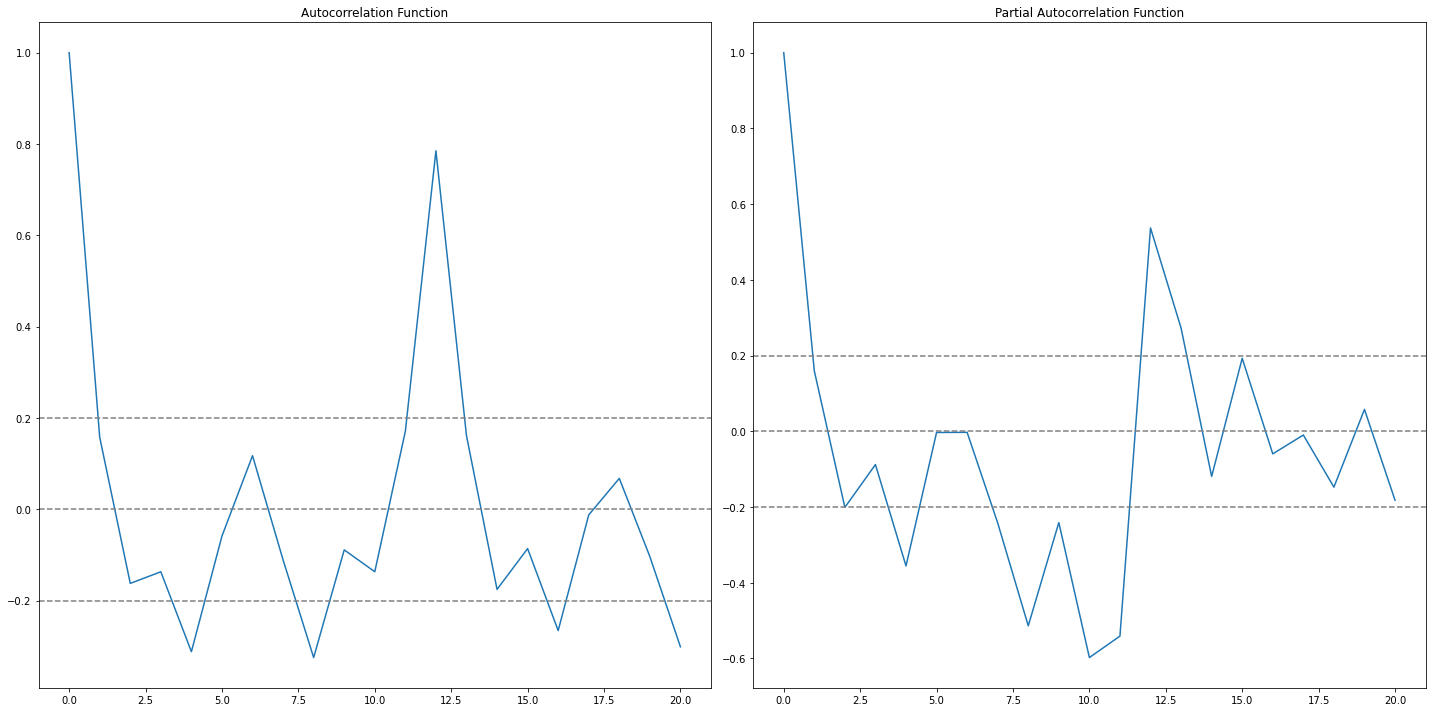

In [38]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

indexedDataset_logScale = np.log(Indexdataset)
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()

lag_acf = acf(datasetLogDiffShifting.dropna(), nlags=20)
lag_pacf = pacf(datasetLogDiffShifting.dropna(), nlags=20, method='ols')

#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


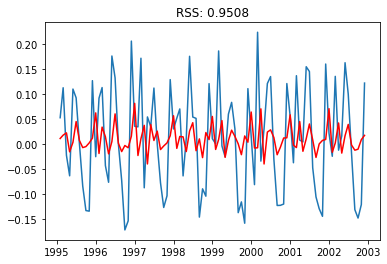

In [39]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting.Passengers.dropna())**2))
print('Plotting AR model')

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


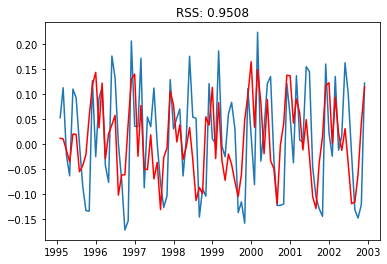

In [40]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting.Passengers.dropna())**2))
print('Plotting MA model')

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 0.7024')

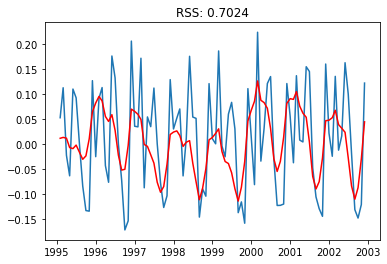

In [41]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting.Passengers.dropna())**2))

In [42]:
# load data
train = pd.read_excel('Airlines+Data.xlsx',sheet_name='Sheet1', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

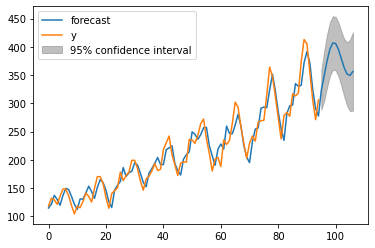

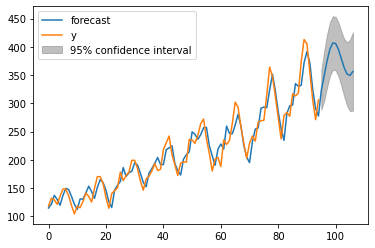

In [43]:
# fit model
model = ARIMA(X, order=(2,1,2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 107) 

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1995-02-01    0.011035
1995-03-01    0.012803
1995-04-01    0.011279
1995-05-01   -0.007585
1995-06-01   -0.009599
dtype: float64


In [45]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1995-02-01    0.011035
1995-03-01    0.023838
1995-04-01    0.035117
1995-05-01    0.027531
1995-06-01    0.017932
dtype: float64


# ARIMA Hyperparameters by GRID Search

In [46]:
df= pd.read_excel('Airlines+Data.xlsx',sheet_name='Sheet1',parse_dates=True, header=0,index_col=0)
# separate out a validation dataset
split_point = len(df) - 10
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)  

Dataset 86, Validation 10


In [47]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]  

In [48]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse) 

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

# ARIMA Hyperparameters

In [49]:
# grid search ARIMA parameters for a time series

from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse  

# Grid search for p,d,q values

In [50]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  

In [51]:
# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
evaluate_models(X, p_values, d_values, q_values)   

ARIMA(0, 0, 0) RMSE=38.466
ARIMA(0, 0, 1) RMSE=24.176
ARIMA(0, 1, 0) RMSE=17.100
ARIMA(0, 1, 1) RMSE=17.354
ARIMA(1, 0, 0) RMSE=18.317
ARIMA(1, 0, 1) RMSE=18.416
ARIMA(1, 1, 0) RMSE=17.284
Best ARIMA(0, 1, 0) RMSE=17.100


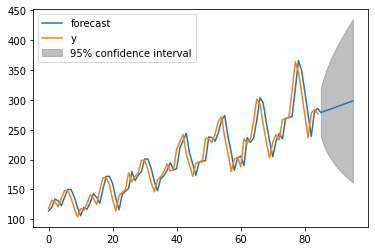

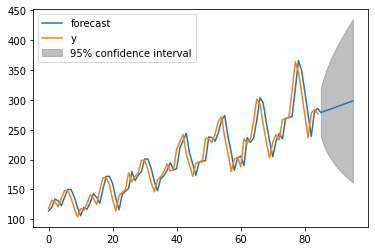

In [52]:
# fit model
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 96) 

In [53]:
forecast

array([278.94117647, 280.88235294, 282.82352941, 284.76470588,
       286.70588235, 288.64705882, 290.58823529, 292.52941176,
       294.47058824, 296.41176471])